In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [180]:
df_train = pd.read_csv("../data/clean_train.csv")
df_train.head(3)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_deck,solo
0,0,lower,"braund,_mr._owen_harris",male,22.0,1,0,a/5_21171,7.2500,unknown,s,u,0
1,1,upper,"cumings,_mrs._john_bradley_(florence_briggs_th...",female,38.0,1,0,pc_17599,71.2833,c85,c,c,0
2,1,lower,"heikkinen,_miss._laina",female,26.0,0,0,ston/o2._3101282,7.9250,unknown,s,u,1


In [181]:
df_train.shape

(891, 13)

In [182]:
global_survivorship = df_train['survived'].mean()
global_survivorship

np.float64(0.3838383838383838)

In [183]:
df_train.groupby('cabin').size().sort_values

<bound method Series.sort_values of cabin
a10          1
a14          1
a16          1
a19          1
a20          1
          ... 
f_g63        1
f_g73        2
g6           4
t            1
unknown    687
Length: 148, dtype: int64>

In [184]:
numerical_features = ['age', 'sibsp', 'parch', 'fare']
categorical_features = ['pclass', 'sex', 'embarked', 'cabin', 'cabin_deck', 'solo']

In [185]:
for column in df_train.columns:
    print(df_train[column].value_counts())
    print()

survived
0    549
1    342
Name: count, dtype: int64

pclass
lower     491
upper     216
middle    184
Name: count, dtype: int64

name
braund,_mr._owen_harris                                1
cumings,_mrs._john_bradley_(florence_briggs_thayer)    1
heikkinen,_miss._laina                                 1
futrelle,_mrs._jacques_heath_(lily_may_peel)           1
allen,_mr._william_henry                               1
                                                      ..
montvila,_rev._juozas                                  1
graham,_miss._margaret_edith                           1
johnston,_miss._catherine_helen_"carrie"               1
behr,_mr._karl_howell                                  1
dooley,_mr._patrick                                    1
Name: count, Length: 891, dtype: int64

sex
male      577
female    314
Name: count, dtype: int64

age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1

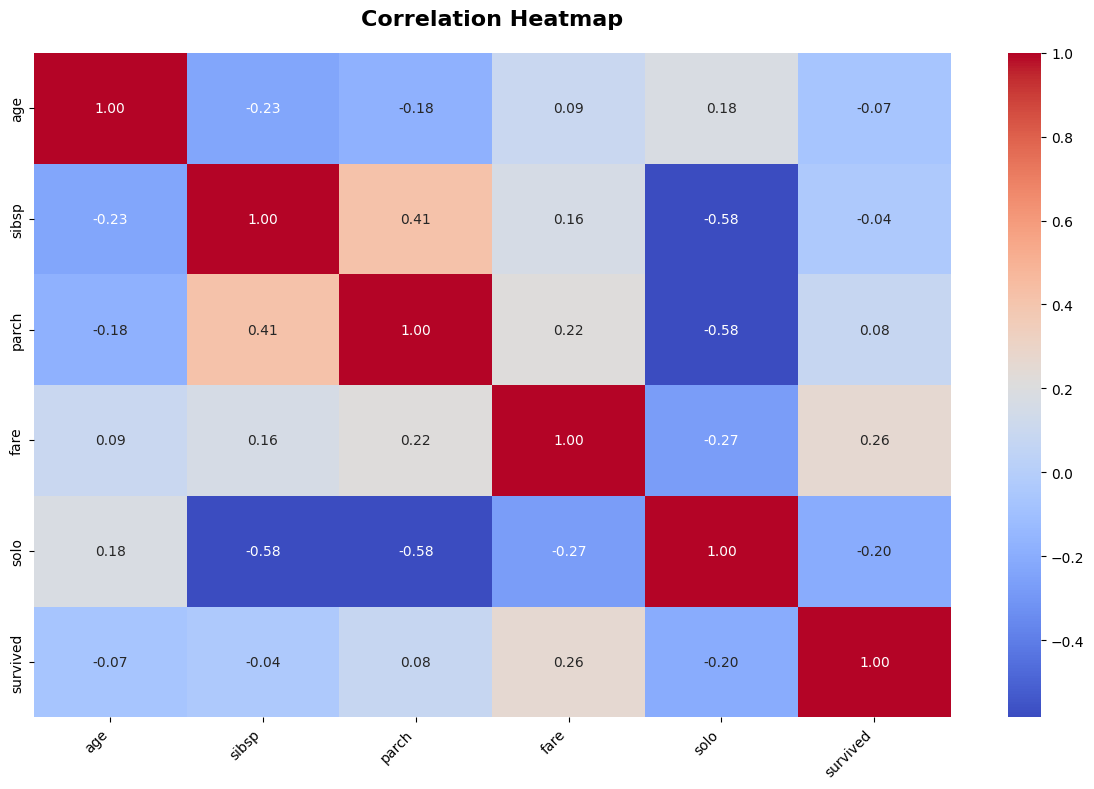

In [186]:
corr = df_train[numerical_features + ['solo',  'survived']].corr()
plt.figure(figsize=(12, 8))  
sns.heatmap(
    corr, 
    annot=True,           
    fmt=".2f",            
    cmap="coolwarm",       
    cbar=True,             
)

plt.title("Correlation Heatmap", fontsize=16, weight='bold', pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)  
plt.yticks(fontsize=10)                          
plt.tight_layout()                               
plt.show()



# Survivor rate

In [187]:
df_train['child'] = (df_train.age < 13).astype(int)
df_train['solo_man'] = ((df_train.age > 13) * (df_train.sex == 'male') * (df_train.solo == 1)).astype(int)
df_train['woman_or_child'] = ((df_train.age < 13) * (df_train.sex == 'female')).astype(int)
categorical_features.append('child')
categorical_features.append('solo_man')
categorical_features.append('woman_or_child')

In [188]:
# If survior ratio is greater than 1, the category is more likely to survive, and if the ratio is lower than 1,the category is less likely to survive.

for c in categorical_features:
    print(c)
    df_group = df_train.groupby(c).survived.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_survivorship
    df_group['survive_ratio'] = df_group['mean'] / global_survivorship
    display(df_group)
    print()
    print()

pclass


,mean,count,diff,survive_ratio
pclass,,,,
lower,0.242363,491,-0.141476,0.631418
middle,0.472826,184,0.088988,1.231836
upper,0.629630,216,0.245791,1.640351




sex


,mean,count,diff,survive_ratio
sex,,,,
female,0.742038,314,0.35820,1.933205
male,0.188908,577,-0.19493,0.492155




embarked


,mean,count,diff,survive_ratio
embarked,,,,
c,0.553571,168,0.169733,1.442199
q,0.389610,77,0.005772,1.015038
s,0.336957,644,-0.046882,0.877860
unknown,1.000000,2,0.616162,2.605263




cabin


,mean,count,diff,survive_ratio
cabin,,,,
a10,0.000000,1,-0.383838,0.000000
a14,0.000000,1,-0.383838,0.000000
a16,1.000000,1,0.616162,2.605263
a19,0.000000,1,-0.383838,0.000000
a20,1.000000,1,0.616162,2.605263
...,...,...,...,...
f_g63,0.000000,1,-0.383838,0.000000
f_g73,0.000000,2,-0.383838,0.000000
g6,0.500000,4,0.116162,1.302632




cabin_deck


,mean,count,diff,survive_ratio
cabin_deck,,,,
a,0.466667,15,0.082828,1.215789
b,0.744681,47,0.360842,1.940090
c,0.593220,59,0.209382,1.545495
d,0.757576,33,0.373737,1.973684
e,0.750000,32,0.366162,1.953947
f,0.615385,13,0.231546,1.603239
g,0.500000,4,0.116162,1.302632
t,0.000000,1,-0.383838,0.000000
u,0.299854,687,-0.083984,0.781200




solo


,mean,count,diff,survive_ratio
solo,,,,
0,0.505650,354,0.121811,1.317351
1,0.303538,537,-0.080300,0.790797




child


,mean,count,diff,survive_ratio
child,,,,
0,0.367397,822,-0.016442,0.957165
1,0.579710,69,0.195872,1.510297




solo_man


,mean,count,diff,survive_ratio
solo_man,,,,
0,0.577963,481,0.194124,1.505745
1,0.156098,410,-0.227741,0.406675




woman_or_child


,mean,count,diff,survive_ratio
woman_or_child,,,,
0,0.376019,859,-0.007820,0.979627
1,0.593750,32,0.209912,1.546875


# Mutual information

In [189]:
from sklearn.metrics import mutual_info_score

def mutual_info_survive_score(series):
    return mutual_info_score(series, df_train.survived)

In [190]:
mi = df_train[categorical_features].apply(mutual_info_survive_score)
mi.sort_values(ascending=False)

cabin             0.165236
sex               0.150870
solo_man          0.098998
pclass            0.058107
cabin_deck        0.055122
solo              0.020593
embarked          0.016668
child             0.006588
woman_or_child    0.003350
dtype: float64

# Feature importance: Correlation

In [191]:
df_train[numerical_features].corrwith(df_train.survived).abs()

age      0.069809
sibsp    0.035322
parch    0.081629
fare     0.257307
dtype: float64

## Kids

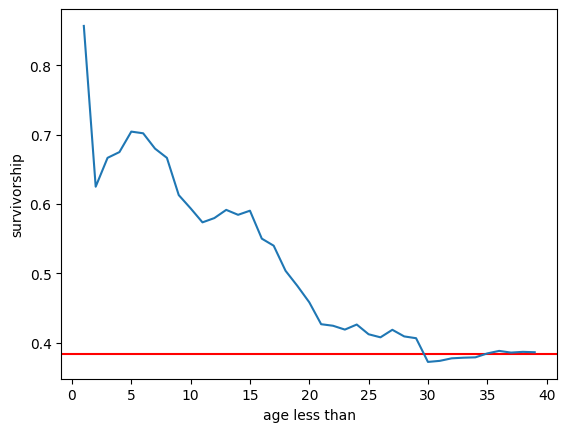

In [192]:
kids_score = []
for kid_age_threshold in range(1, 40):
    kids_score.append((df_train[df_train.age <= kid_age_threshold].survived.mean(), kid_age_threshold))
df_kids = pd.DataFrame(kids_score, columns=['survivorship', 'age_threshold'])

plt.xlabel('age less than')
plt.ylabel('survivorship')
plt.axhline(y=global_survivorship, label='sadasdasddf', c='red')
plt.plot(df_kids['age_threshold'], df_kids['survivorship'])

In [193]:
print(df_train[df_train.age <= 2].survived.mean())
print(df_train[(df_train.age > 2) & (df_train.age <= 10)].survived.mean())
print(df_train[(df_train.age > 10) & (df_train.age <= 19)].survived.mean())

0.625
0.575
0.41


In [194]:
def make_crosstab_plot(c1: str, c2: str):
    plt.figure(figsize=(8, 6))
    # survive_rate = df_train.groupby([c1, c2])['survived'].agg('mean').reset_index()
    ctab = pd.crosstab(df_train[c1], df_train[c2], values=df_train['survived'], aggfunc=['mean', 'sum'])
    sns.heatmap(ctab, cmap='coolwarm', annot=True)


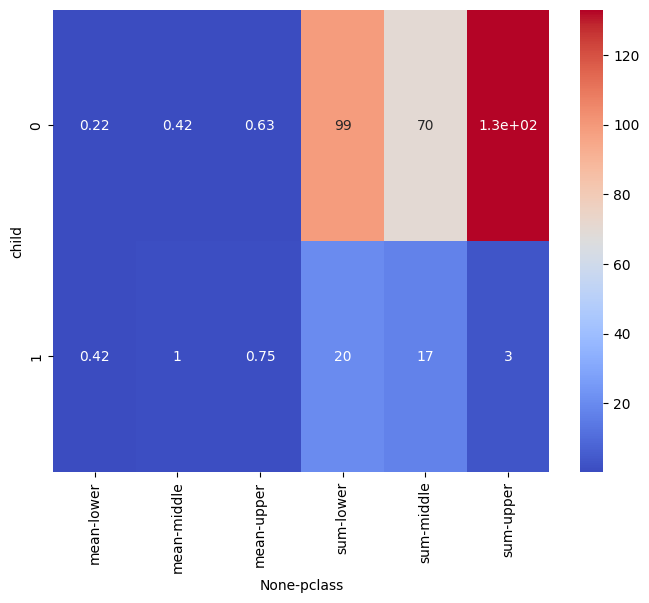

In [195]:
df_train['child'] = (df_train['age'] < 13).astype(int)
make_crosstab_plot('child', 'pclass')

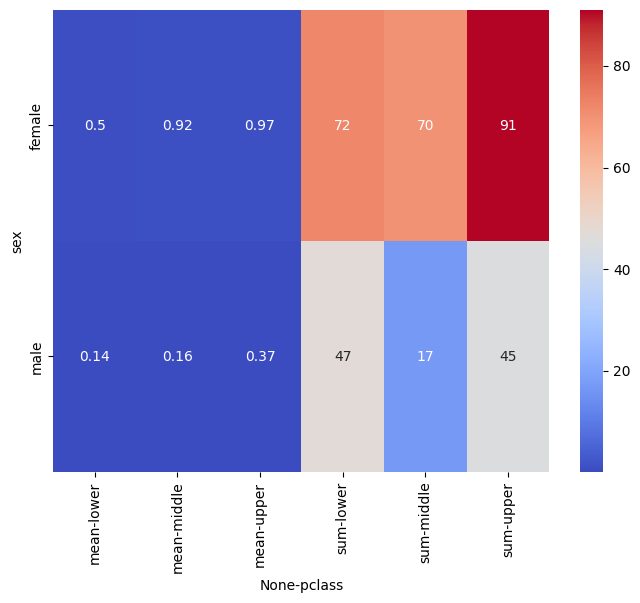

In [196]:
make_crosstab_plot('sex', 'pclass')

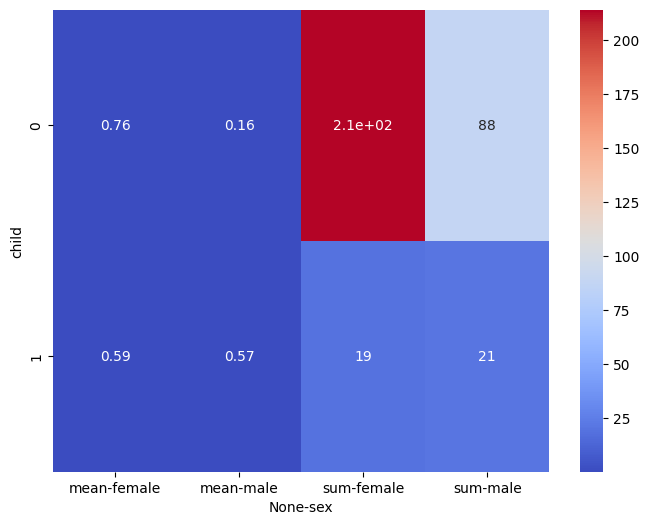

In [197]:
# no difference in survival between sexes in children 
make_crosstab_plot('child', 'sex')

# Fare 

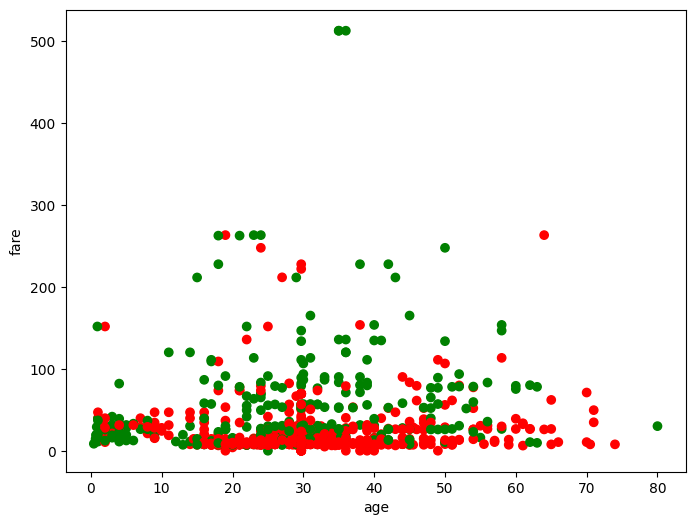

In [198]:
colors = df_train['survived'].map({0: 'red', 1: 'green'})
plt.figure(figsize=(8,6))
plt.xlabel('age')
plt.ylabel('fare')

plt.scatter(df_train['age'], df_train['fare'], c=colors)

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64

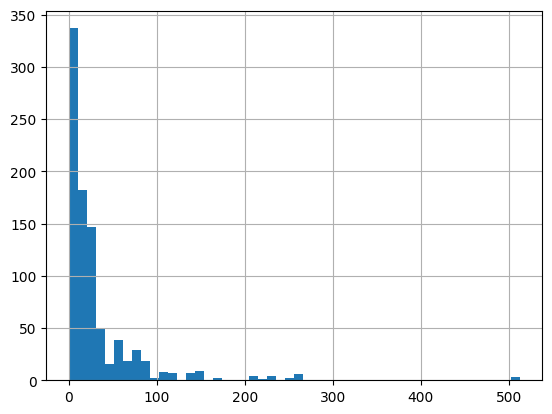

In [199]:
df_train.fare.hist(bins=50)
df_train['fare'].value_counts()

In [ ]:
# Cheap tickets
print(df_train[(df_train.fare <= 20) & (df_train.fare > 0) & (df_train.age > 17)].survived.mean())
# Medium or expensive tickets
print(df_train[(df_train.fare > 20) & (df_train.age > 17)].survived.mean())

df_group = df_train.groupby('pclass').fare.agg(['mean', 'count'])
df_group

0.24833702882483372
0.5384615384615384


,mean,count
pclass,,
lower,13.675550,491
middle,20.662183,184
upper,84.154687,216


In [201]:
df_train.groupby('pclass')['fare'].mean()

pclass
lower     13.675550
middle    20.662183
upper     84.154687
Name: fare, dtype: float64

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'solo'}>],
       [<Axes: title={'center': 'child'}>,
        <Axes: title={'center': 'solo_man'}>,
        <Axes: title={'center': 'woman_or_child'}>]], dtype=object)

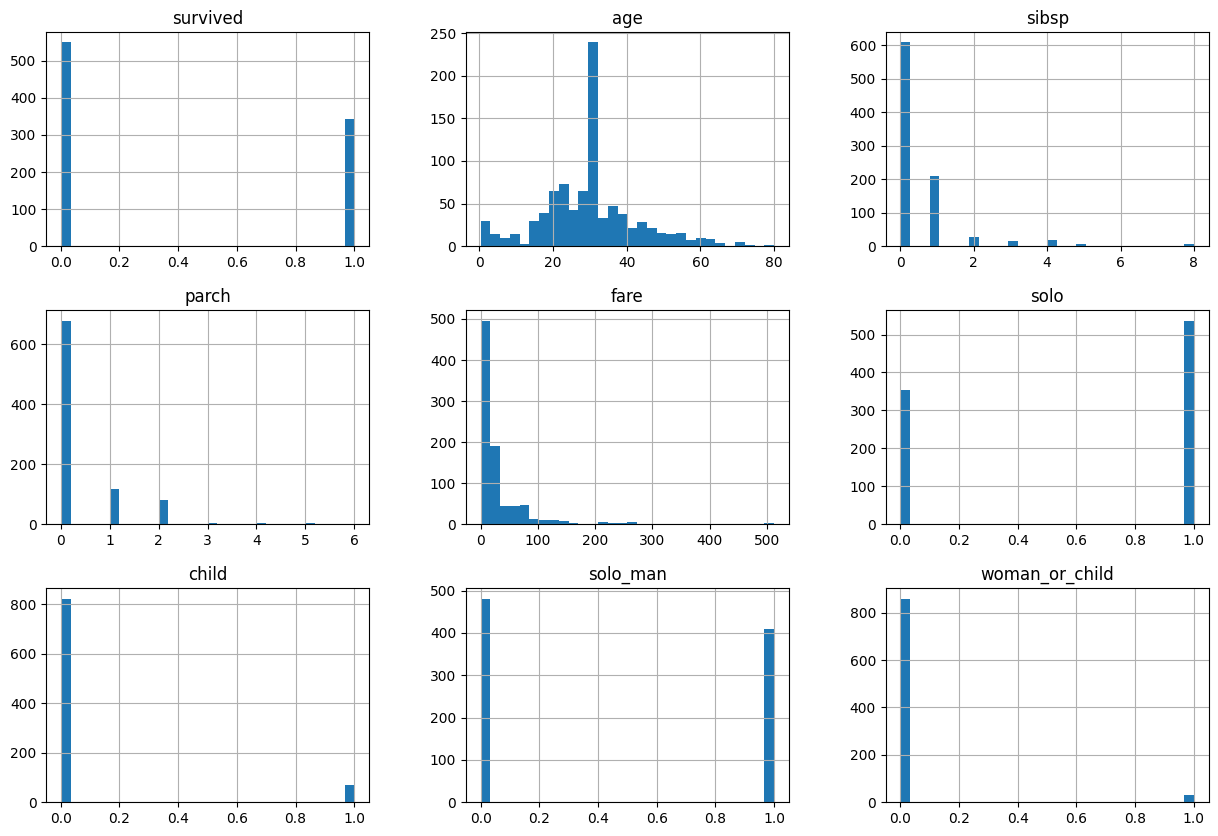

In [202]:
df_train.hist(bins=30, figsize=(15, 10))

# Conclusions
What gave you bigger chance to survive?
+ being from upper class (or just not being from lower class)
+ having more expensive tickets (related to pclass)
+ being female
+ being child
+ travelling with someone